Step 1: Import Required Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime

Step 2: Load the Dataset

In [93]:
df1 = pd.read_csv("D://Machine Learning projects//Supervised learning//TCS Stock Data//TCS_stock_action.csv")
df1

,Date,Dividends,Stock Splits
0,2004-10-28,0.3750,0.0
1,2005-02-03,0.4375,0.0
2,2005-07-06,0.6250,0.0
3,2005-08-18,0.3750,0.0
4,2005-10-18,0.3750,0.0
...,...,...,...
65,2020-07-16,5.0000,0.0
66,2020-10-14,12.0000,0.0
67,2021-01-14,6.0000,0.0
68,2021-05-25,15.0000,0.0


In [94]:
df = pd.read_csv("D://Machine Learning projects//Supervised learning//TCS Stock Data//TCS_stock_history.csv")
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0
...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0


In [95]:
df3 = pd.read_csv("D://Machine Learning projects//Supervised learning//TCS Stock Data//TCS_stock_info.csv")
df3

,zip,400001
0,sector,Technology
1,fullTimeEmployees,509058
2,longBusinessSummary,Tata Consultancy Services Limited provides inf...
3,city,Mumbai
4,phone,91 22 6778 9999
...,...,...
145,dividendYield,0.0105
146,bidSize,0
147,dayHigh,3805
148,regularMarketPrice,3773.2


In [96]:
df['Date'] = pd.to_datetime(df['Date'])

In [97]:
df.sort_values(by='Date',inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [98]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4463 non-null   datetime64[ns]
 1   Open          4463 non-null   float64       
 2   High          4463 non-null   float64       
 3   Low           4463 non-null   float64       
 4   Close         4463 non-null   float64       
 5   Volume        4463 non-null   int64         
 6   Dividends     4463 non-null   float64       
 7   Stock Splits  4463 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 279.1 KB


In [100]:
df['Open'] = pd.to_numeric(df['Open'],errors = 'coerce')
df['High'] = pd.to_numeric(df['High'],errors = 'coerce')
df['Low'] = pd.to_numeric(df['Low'],errors = 'coerce')
df['Close'] = pd.to_numeric(df['Close'],errors = 'coerce')

In [101]:
df.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,2012-08-23 19:22:31.109119488,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
min,2002-08-12 00:00:00,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,2008-02-14 12:00:00,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,2012-09-04 00:00:00,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,2017-03-22 12:00:00,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000
std,NaN,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842


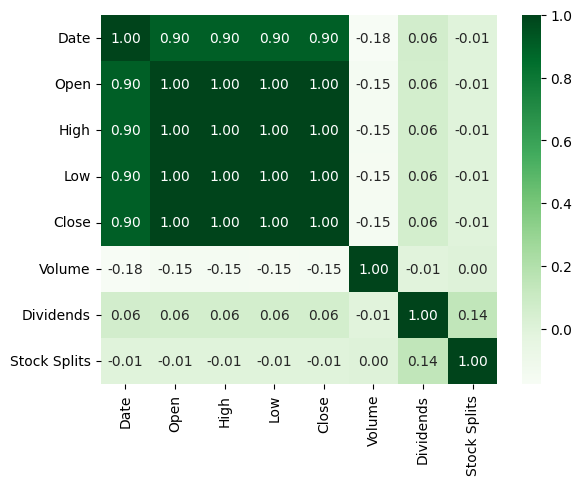

In [102]:
sns.heatmap(df.corr(),annot= True,cmap= "Greens",fmt=".2f")
plt.show()

Exploratory Data Analysis

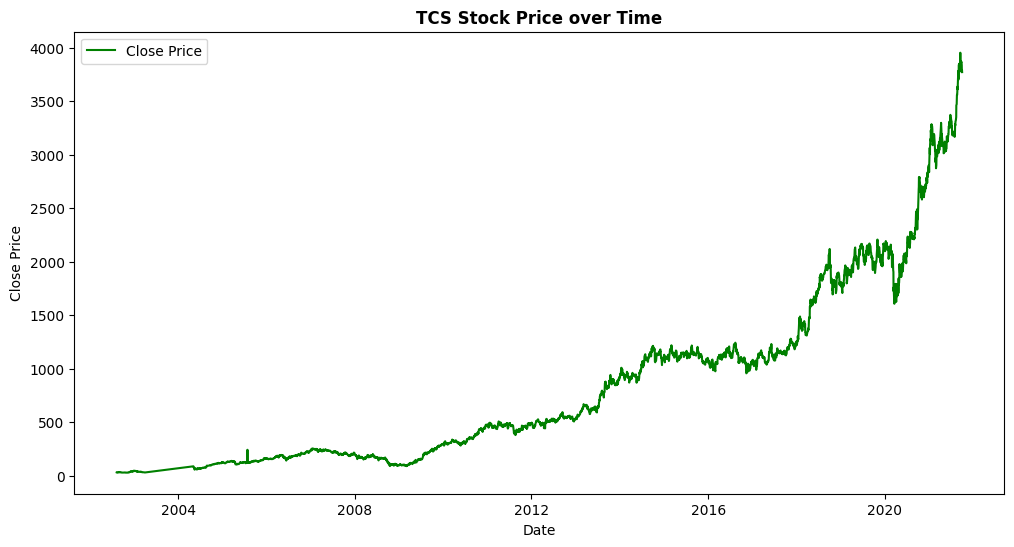

In [103]:
#TCS Stock Price over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price',
color='g')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price over Time',weight = "bold")
plt.legend()

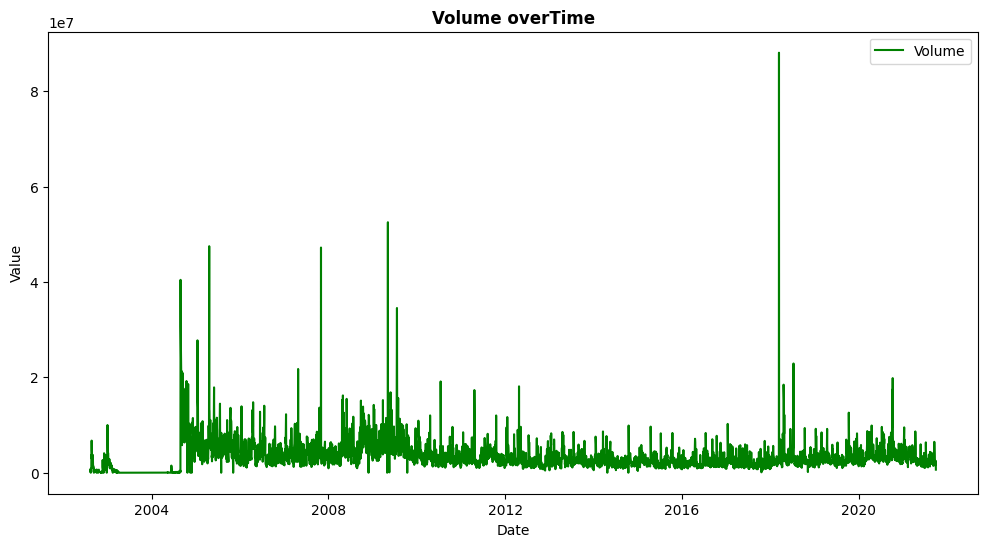

In [104]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='g')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume overTime',weight = "bold")
plt.legend()
plt.show()


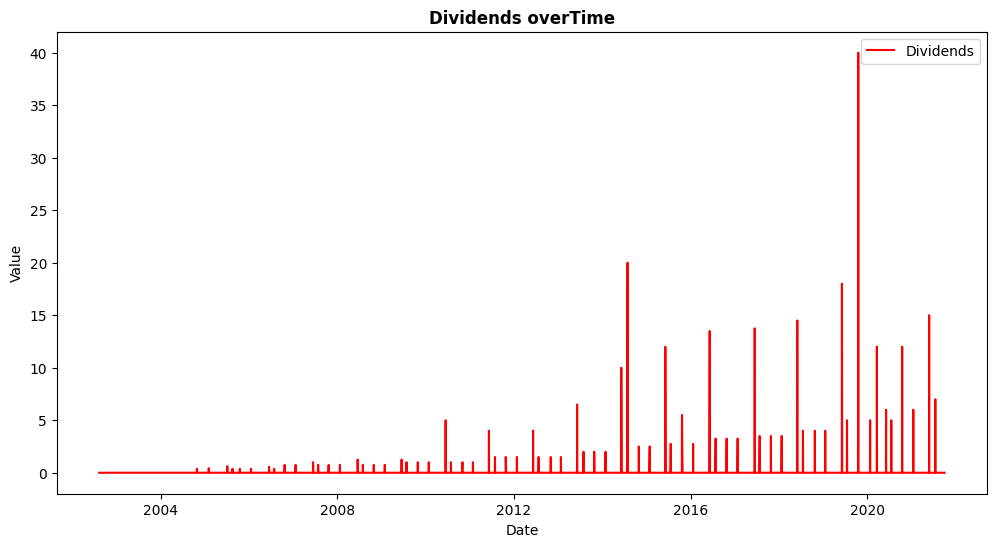

In [105]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Dividends'], label='Dividends',color='r')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Dividends overTime',weight = "bold")
plt.legend()
plt.show()


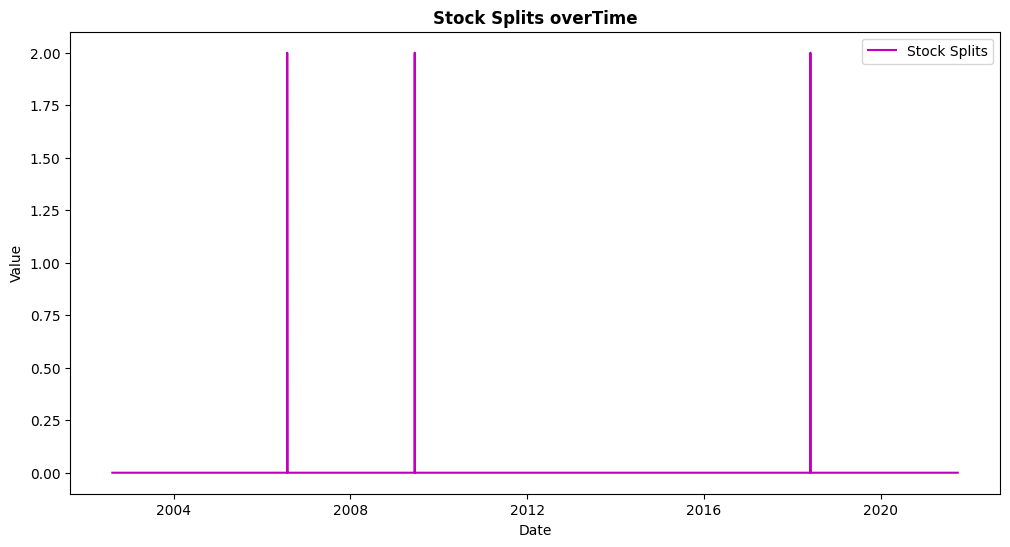

In [106]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Stock Splits'], label='Stock Splits',color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Stock Splits overTime',weight = "bold")
plt.legend()
plt.show()


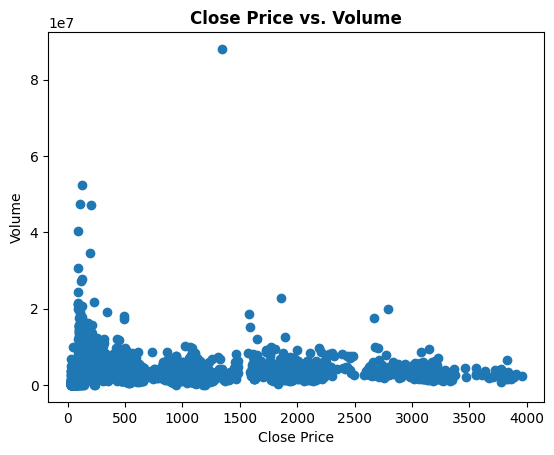

In [107]:
#Close vs Volume

plt.scatter(df['Close'], df['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show()

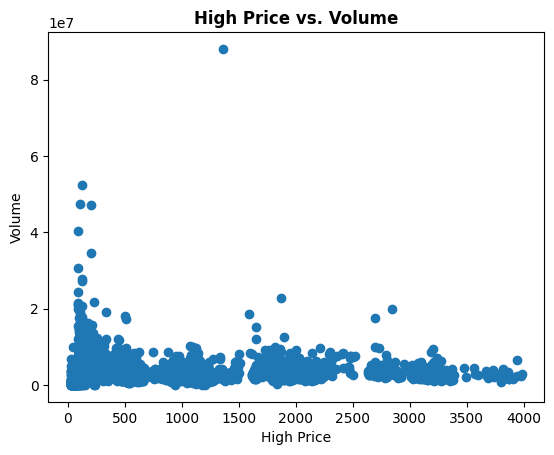

In [108]:
#High vs Volume
plt.scatter(df['High'], df['Volume'])
plt.xlabel('High Price')
plt.ylabel('Volume')
plt.title('High Price vs. Volume',weight= "bold")
plt.show()

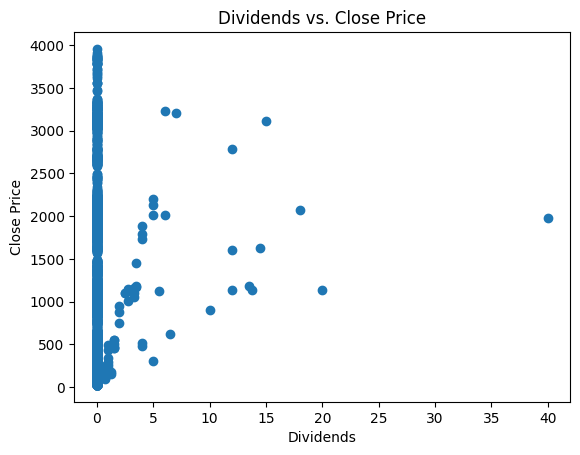

In [109]:
# Dividends vs. Close Price
plt.scatter(df['Dividends'], df['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()

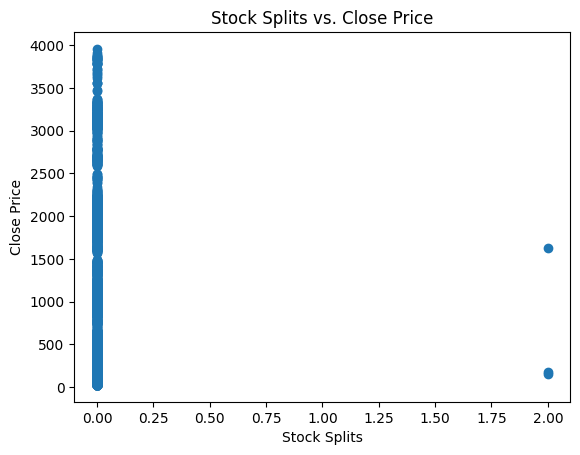

In [110]:
# Stock Splits vs. Close Price
plt.scatter(df['Stock Splits'], df['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()

Moving Averages

In [111]:
df['30-Day Moving Avg'] = df['Close'].rolling(window=30).mean()

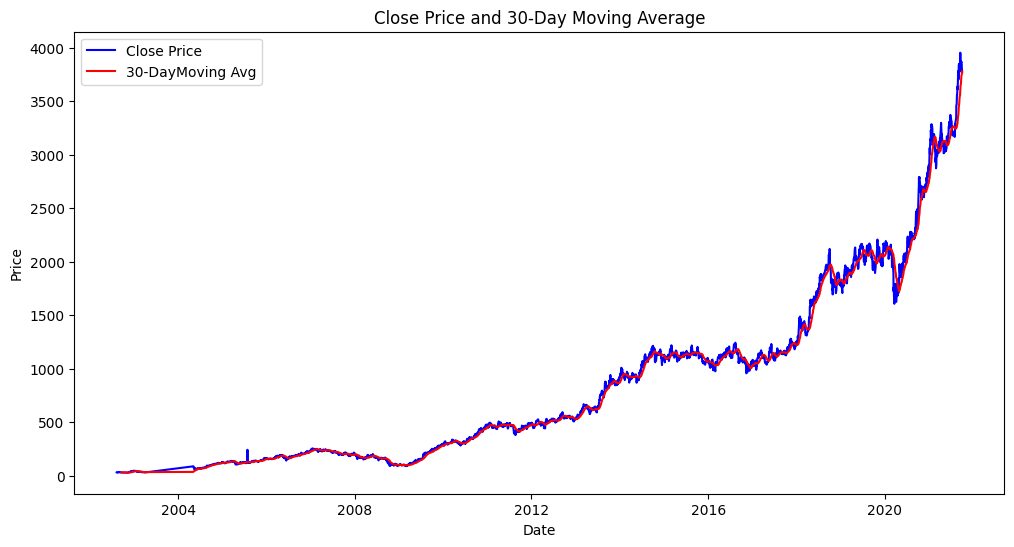

In [112]:
# Plot Close price and moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price',color='b')
plt.plot(df['Date'], df['30-Day Moving Avg'], label='30-DayMoving Avg', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-Day Moving Average')
plt.legend()
plt.show()

Moving Average Crossover Strategy

In [113]:
df['Short_MA'] = df['Close'].rolling(window=5).mean()
df['Long_MA'] = df['Close'].rolling(window=30).mean()

In [114]:
# Creating a trading signals based on moving average crossovers
df['Signal'] = np.where(df['Short_MA'] > df['Long_MA'], 1, -1)

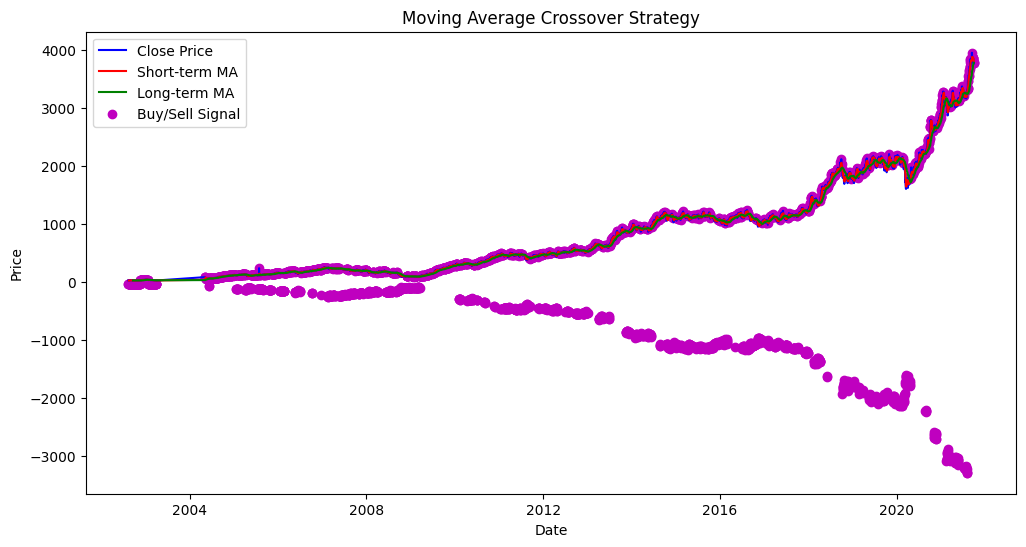

In [115]:
# Plot the strategy signals
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price',
color='b')
plt.plot(df['Date'], df['Short_MA'], label='Short-term MA',
color='r')
plt.plot(df['Date'], df['Long_MA'], label='Long-term MA',
color='g')
plt.scatter(df['Date'], df['Close'] * df['Signal'],
label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

Daily Price Change

In [116]:
df['Daily_Price_Change'] = df['Close'].pct_change() * 100

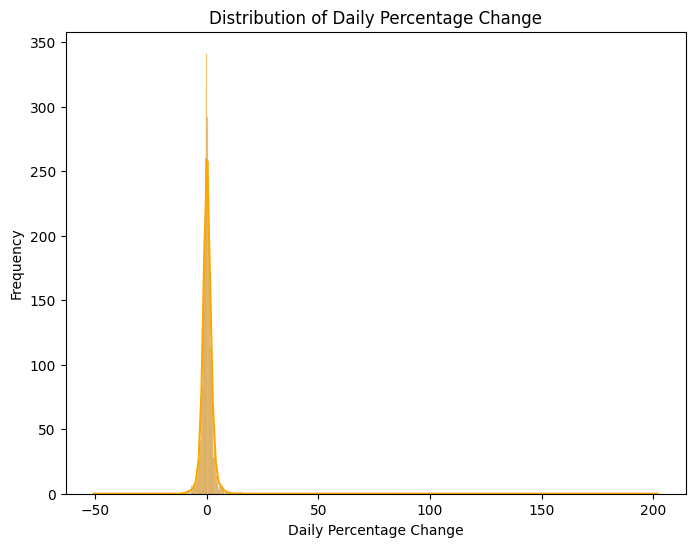

In [117]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Daily_Price_Change'].dropna(), kde=True,
color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()

Feature Engineering

In [118]:
df['Moving_Avg_Close'] = df['Close'].rolling(window=7).mean()

In [119]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek

In [120]:
# Lag Features
df['Prev_Close'] = df['Close'].shift(1)

In [121]:
df.dropna(inplace=True)

In [122]:
# Feature selection
X = df[['Open', 'High', 'Low', 'Volume', 'Prev_Close',
'Day_of_Week', 'Month']]
y = df['Close']

In [123]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [124]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [125]:
# Predictions
y_pred = model.predict(X_test)
# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test,
y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 54.64933414062909
R-Squared Score: 0.9999224414309594


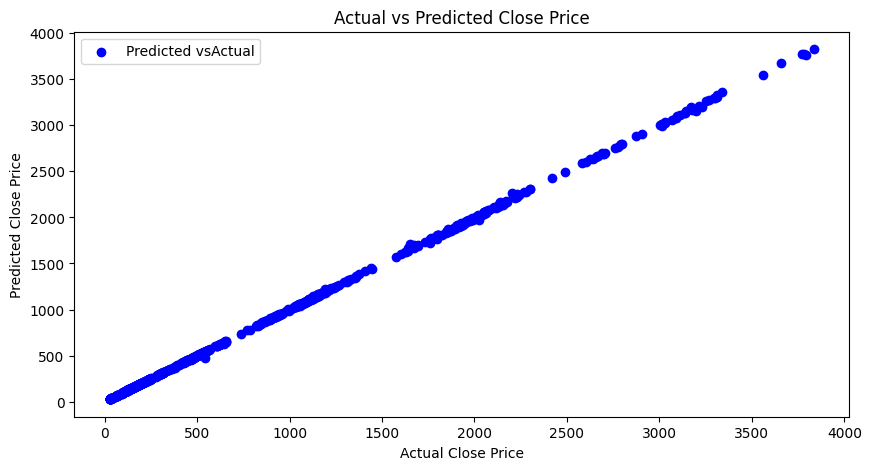

In [126]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vsActual')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [127]:
import pickle
with open('TCS_Stock_Predictor.pkl', 'wb') as file:
    pickle.dump(model, file)

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'Linear': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results[name] = {
        'MSE': mean_squared_error(y_test, pred),
        'MAE': mean_absolute_error(y_test, pred),
        'R2': r2_score(y_test, pred)
    }
print(results)


{'Linear': {'MSE': 54.64933414062909, 'MAE': 4.0075908231898945, 'R2': 0.9999224414309594}, 'RandomForest': {'MSE': 126.50907483804504, 'MAE': 5.66527297036086, 'R2': 0.9998204577792323}, 'XGBoost': {'MSE': 244.65622046282334, 'MAE': 7.525652798348376, 'R2': 0.999652782844213}}


In [130]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[['Close']])

def create_seq(data, seq_len=60):
    Xs, ys = [], []
    for i in range(seq_len, len(data)):
        Xs.append(data[i-seq_len:i])
        ys.append(data[i])
    return np.array(Xs), np.array(ys)

SEQ_LEN = 60
X_seq, y_seq = create_seq(data_scaled, SEQ_LEN)
split = int(0.8 * len(X_seq))
X_tr, X_te = X_seq[:split], X_seq[split:]
y_tr, y_te = y_seq[:split], y_seq[split:]


In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(SEQ_LEN,1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_tr, y_tr, epochs=30, batch_size=32, validation_split=0.1)


c:\Users\sures\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 29s 210ms/step - loss: 0.0059 - val_loss: 1.3009e-04
Epoch 2/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 18s 179ms/step - loss: 7.6479e-05 - val_loss: 1.3620e-04
Epoch 3/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - loss: 7.0344e-05 - val_loss: 1.4543e-04
Epoch 4/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - loss: 6.2483e-05 - val_loss: 1.5236e-04
Epoch 5/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - loss: 5.5886e-05 - val_loss: 1.5861e-04
Epoch 6/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 22s 224ms/step - loss: 5.3484e-05 - val_loss: 1.8021e-04
Epoch 7/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 32s 124ms/step - loss: 4.6368e-05 - val_loss: 1.7204e-04
Epoch 8/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 23s 152ms/step - loss: 5.5069e-05 - val_loss: 1.4824e-04
Epoch 9/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 18s 123ms/step - loss: 5.0981e-05 - val_loss: 2.2611e-04
Epoch 10/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - loss: 5.1331e-05 - val_loss: 1.4537e-04
Epoch 11/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step

In [133]:
y_pred = model.predict(X_te)
y_te_inv = scaler.inverse_transform(y_te)
y_pred_inv = scaler.inverse_transform(y_pred)

print("LSTM RMSE:", mean_squared_error(y_te_inv, y_pred_inv))
print("LSTM MAE:", mean_absolute_error(y_te_inv, y_pred_inv))
print("LSTM R2:", r2_score(y_te_inv, y_pred_inv))


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
LSTM RMSE: 33538.904801309465
LSTM MAE: 160.02951297433034
LSTM R2: 0.9033640574326945
